In [1]:
!pip install gym==0.24.1
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 696 kB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.24.1-py3-none-any.whl size=793155 sha256=574884a76d97e0166995bc4759eed2286c31bc332d0a6929564cff5609060514
  Stored in directory: /root/.cache/pip/wheels/18/0e/54/63d9f3d16ddf0fec1622e90d28140df5e6016bcf8ea920037d
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.17.3
    Uninstalling gym-0.17.3:
      Successfully uninstalled gym-0.17.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.7 MB/s 


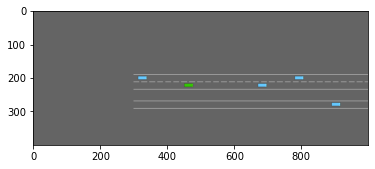

In [5]:
import gym
import highway_env
from matplotlib import pyplot as plt
%matplotlib inline

env = gym.make('merge-v0')
env.seed(0)

env.configure({"controlled_vehicles": 2})  # Two controlled vehicles
env.configure({"vehicles_count": 0})  # A single other vehicle, for the sake of visualisation
env.configure({"simulation_frequency": 15}) 
env.configure({
    "screen_width": 1000,
    "screen_height": 400
})
env.reset()
plt.imshow(env.render(mode="rgb_array"))
plt.show()
# TODO: Check why if I put two controlled vehicles and no vehicles
# in the background still 1 controlled vehicle and 4 in the background appear

In [4]:
import pprint
pprint.pprint(env.config)

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 2,
 'high_speed_reward': 0.2,
 'lane_change_reward': -0.05,
 'manual_control': False,
 'merging_speed_reward': -0.5,
 'observation': {'type': 'Kinematics'},
 'offscreen_rendering': False,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 400,
 'screen_width': 1000,
 'show_trajectories': False,
 'simulation_frequency': 10,
 'vehicles_count': 0}


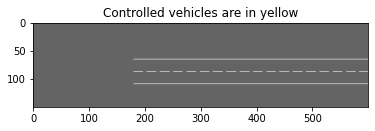

In [ ]:
actions = tuple(0 for agent in range(2))
for i in range(00):
    obs, reward, done, info = env.step(actions)
    # obs, reward, done, info = env.step(np.array([0.01, 0.1]))
    # obs, reward, done, info = env.step(0)
    env.render()
    
plt.imshow(env.render(mode="rgb_array"))
plt.title("Controlled vehicles are in yellow")
plt.show()

In [ ]:
!pip install stable-baselines3
!python -m pip uninstall pyserial --yes
!pip install protobuf==3.19.0
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mario/.pyenv/versions/3.9.6/bin/python3.9 -m pip install --upgrade pip' command.


In [ ]:

from stable_baselines3 import DQN

model = DQN('MlpPolicy', env,
              policy_kwargs=dict(net_arch=[256, 256]),
              learning_rate=5e-4,
              buffer_size=15000,
              learning_starts=200,
              batch_size=32,
              gamma=0.8,
              train_freq=1,
              gradient_steps=1,
              target_update_interval=50,
              verbose=1,
              tensorboard_log="highway_dqn/")
model.learn(int(2e4))
model.save("highway_dqn/model")

# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [ ]:
# Load and test saved model
model = DQN.load("highway_dqn/model")
while True:
  done = False
  obs = env.reset()
  while not done:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    env.render()